# Caclulating "Game Growth Score"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import inf

In [36]:
colnames=['timestamp', 'game_name', 'num_channels', 'num_viewers']

In [37]:
df=pd.read_csv('Natasha.csv',header =None, names = colnames)

In [38]:
df=df.sort_values(by=['game_name','timestamp']).reset_index(drop=True)

In [39]:
df.head()

,timestamp,game_name,num_channels,num_viewers
0,2019-05-21 15:00:00.000,F1 2019,1,1
1,2019-05-21 21:00:00.000,F1 2019,1,1
2,2019-05-21 22:00:00.000,F1 2019,1,2
3,2019-05-25 01:00:00.000,F1 2019,1,235
4,2019-05-25 02:00:00.000,F1 2019,1,247


In [40]:
df['viewer_to_channel_ratio'] = df['num_viewers'] / df['num_channels']

In [41]:
df.shape[0]

2092036

In [43]:
df['game_growth'] = df['viewer_to_channel_ratio'].copy()

In [44]:
df_values=df.values

In [45]:
# look back 168 hours for 1 week time diff
lookback=168
for row_index in range(lookback, df.shape[0]):
    # 0 - time_logged
    # 1 - game_name
    # 2 - num_channels
    # 3 - num_viewers
    # 4 - viewers to channels ratio
    # 5 - viewers to channels ratio (now) / viewers to channels ratio (week ago)
    
# Check if game_name of this row and previous row are the same
    if df_values[row_index,1] == df_values[row_index-lookback,1]:
        last_week_viewer_to_channel_ratio = df_values[row_index-lookback,4]
        if last_week_viewer_to_channel_ratio != 0:
            df_values[row_index,5] = (df_values[row_index,4]/ last_week_viewer_to_channel_ratio )
        else:
            df_values[row_index,5] = 1
    else:
    # If the game names are different, the difference between metrics is invalid, fill with NaN
        df_values[row_index,5] = np.NaN
        


In [46]:
df=pd.DataFrame(df_values).rename(columns={0: 'timestamp',
                                                1: 'game_name',
                                                2: 'num_channels',
                                                3: 'num_viewers',
                                                4: 'viewer_to_channel_ratio',
                                                5: 'game_growth'})

In [55]:
sum(df['game_growth'].isnull())

941598

In [56]:
df.loc[df['game_growth'].notnull()]

,timestamp,game_name,num_channels,num_viewers,viewer_to_channel_ratio,game_growth
0,2019-05-21 15:00:00.000,F1 2019,1,1,1,1
1,2019-05-21 21:00:00.000,F1 2019,1,1,1,1
2,2019-05-21 22:00:00.000,F1 2019,1,2,2,2
3,2019-05-25 01:00:00.000,F1 2019,1,235,235,235
4,2019-05-25 02:00:00.000,F1 2019,1,247,247,247
5,2019-05-26 12:00:00.000,F1 2019,1,38,38,38
6,2019-05-26 13:00:00.000,F1 2019,1,164,164,164
7,2019-05-26 14:00:00.000,F1 2019,1,108,108,108
8,2019-05-26 15:00:00.000,F1 2019,1,22,22,22
9,2019-05-26 16:00:00.000,F1 2019,1,4,4,4


In [65]:
pd.options.display.max_rows=500

In [59]:
scanning_range = 2091838

In [67]:
1838+168

2006

In [70]:
df.loc[df['game_name'] == 'League of Legends']

,timestamp,game_name,num_channels,num_viewers,viewer_to_channel_ratio,game_growth
938390,2019-04-22 00:00:00.000,League of Legends,3160,97898,30.9804,NaN
938391,2019-04-22 01:00:00.000,League of Legends,2784,81123,29.139,NaN
938392,2019-04-22 02:00:00.000,League of Legends,2701,85038,31.4839,NaN
938393,2019-04-22 03:00:00.000,League of Legends,2687,91431,34.0272,NaN
938394,2019-04-22 04:00:00.000,League of Legends,2486,109476,44.037,NaN
938395,2019-04-22 05:00:00.000,League of Legends,2270,99371,43.7758,NaN
938396,2019-04-22 06:00:00.000,League of Legends,2011,99701,49.5778,NaN
938397,2019-04-22 07:00:00.000,League of Legends,1784,80479,45.1115,NaN
938398,2019-04-22 08:00:00.000,League of Legends,1642,83500,50.8526,NaN
938399,2019-04-22 09:00:00.000,League of Legends,1691,82764,48.9438,NaN


In [68]:
df.loc[df['game_name']=='League of Legends'].iloc[scanning_range:scanning_range+400]

,timestamp,game_name,num_channels,num_viewers,viewer_to_channel_ratio,game_growth


In [72]:
LoL_growth_df = df.loc[df['game_name'] == 'League of Legends']

In [74]:
LoL_growth_df

,timestamp,game_name,num_channels,num_viewers,viewer_to_channel_ratio,game_growth
938390,2019-04-22 00:00:00.000,League of Legends,3160,97898,30.9804,NaN
938391,2019-04-22 01:00:00.000,League of Legends,2784,81123,29.139,NaN
938392,2019-04-22 02:00:00.000,League of Legends,2701,85038,31.4839,NaN
938393,2019-04-22 03:00:00.000,League of Legends,2687,91431,34.0272,NaN
938394,2019-04-22 04:00:00.000,League of Legends,2486,109476,44.037,NaN
938395,2019-04-22 05:00:00.000,League of Legends,2270,99371,43.7758,NaN
938396,2019-04-22 06:00:00.000,League of Legends,2011,99701,49.5778,NaN
938397,2019-04-22 07:00:00.000,League of Legends,1784,80479,45.1115,NaN
938398,2019-04-22 08:00:00.000,League of Legends,1642,83500,50.8526,NaN
938399,2019-04-22 09:00:00.000,League of Legends,1691,82764,48.9438,NaN


In [82]:
LoL_growth_df['timestamp'].values

array(['2019-04-22 00:00:00.000', '2019-04-22 01:00:00.000',
       '2019-04-22 02:00:00.000', '2019-04-22 03:00:00.000',
       '2019-04-22 04:00:00.000', '2019-04-22 05:00:00.000',
       '2019-04-22 06:00:00.000', '2019-04-22 07:00:00.000',
       '2019-04-22 08:00:00.000', '2019-04-22 09:00:00.000',
       '2019-04-22 10:00:00.000', '2019-04-22 11:00:00.000',
       '2019-04-22 12:00:00.000', '2019-04-22 13:00:00.000',
       '2019-04-22 14:00:00.000', '2019-04-22 15:00:00.000',
       '2019-04-22 16:00:00.000', '2019-04-22 17:00:00.000',
       '2019-04-22 18:00:00.000', '2019-04-22 19:00:00.000',
       '2019-04-22 20:00:00.000', '2019-04-22 21:00:00.000',
       '2019-04-22 22:00:00.000', '2019-04-22 23:00:00.000',
       '2019-04-23 00:00:00.000', '2019-04-23 01:00:00.000',
       '2019-04-23 02:00:00.000', '2019-04-23 03:00:00.000',
       '2019-04-23 04:00:00.000', '2019-04-23 05:00:00.000',
       '2019-04-23 06:00:00.000', '2019-04-23 07:00:00.000',
       '2019-04-23 08:00

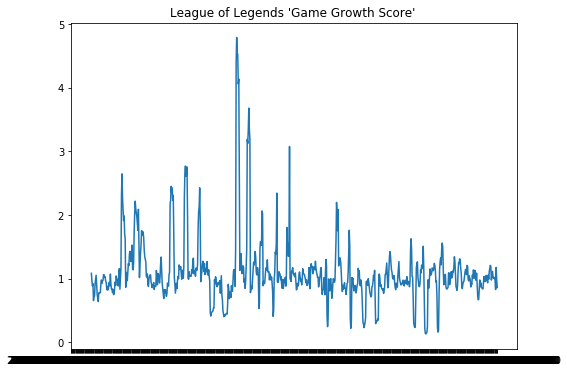

In [84]:
fig, ax = plt.subplots(figsize=(8,6))
# Set background of area behind axis labels
fig.patch.set_facecolor('white')
plt.plot(LoL_growth_df['timestamp'].values, LoL_growth_df['game_growth'].values)
plt.title("League of Legends 'Game Growth Score' ")
plt.show()

In [34]:
pd.DataFrame(df,header=Nonenames = colnames)

TypeError: __init__() got an unexpected keyword argument 'names'

In [85]:
# Trying with Dataframe, takes too long
# # look back 168 hours for 1 week time diff
# lookback=168
# for row_index in range(lookback, df.shape[0]):
#     # 0 - time_logged
#     # 1 - game_name
#     # 2 - num_channels
#     # 3 - num_viewers
#     # 4 - viewers to channels ratio
#     # 5 - viewers to channels ratio (now) / viewers to channels ratio (week ago)
    
# # Check if game_name of this row and previous row are the same
#     if df.iloc[row_index,1] == df.iloc[row_index-lookback,1]:
#         last_week_viewer_to_channel_ratio = df.iloc[row_index-lookback,4]
#         if last_week_viewer_to_channel_ratio != 0:
#             df.iloc[row_index,5] = (df.iloc[row_index,4]/ last_week_viewer_to_channel_ratio )
#         else:
#             df.iloc[row_index,5] = 1
#     else:
#     # If the game names are different, the difference between metrics is invalid, fill with NaN
#         df.iloc[row_index,5] = np.NaN
        
